In [1]:
from mpytools import Catalog
import utils
import glob
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import os 
plt.style.use('/home/users/r/rocher/Code/plot_style.txt')
dir_to_data = '/home/users/r/rocher/cosmo3d/4MOST/data_v3/'
target_4m_lrg = Catalog.read(os.path.join(dir_to_data, 'desi_lrg_nomaskbit_mask_4M.fits'))
target_4m_bg = Catalog.read(os.path.join(dir_to_data, 'desi_bg_nomaskbit_mask_4M.fits'))

mask_pixmap = Catalog.read('data/Legacy_Imaging_DR10_footprint_128.fits')
features_pixmap = Catalog.read('data/pixweight-dr10-128-new.fits')



In [2]:
mask = utils.get_4most_bg_sel_v2(target_4m_bg)
target_4m_bg = target_4m_bg[mask]

mask = utils.get_4most_lrg_new_sel(target_4m_lrg)
target_4m_lrg = target_4m_lrg[mask]

/home/users/r/rocher/.conda/envs/cosmoenv/lib/python3.9/site-packages/mpytools/core.py:542: RuntimeWarning: invalid value encountered in log10
  results = super().__array_ufunc__(ufunc, method, *args, **kwargs)
/home/users/r/rocher/.conda/envs/cosmoenv/lib/python3.9/site-packages/mpytools/core.py:542: RuntimeWarning: divide by zero encountered in log10
  results = super().__array_ufunc__(ufunc, method, *args, **kwargs)


In [ ]:
nside=128 
tracer='LRG'
cat_tar = target_4m_lrg if tracer=='LRG' else target_4m_bg
targets = utils.create_hp_map(cat_tar['RA'], cat_tar['DEC'], nside=nside, nest=True)
targets[~mask_pixmap['ISDES']] = 0
utils.plot_moll(targets, min=0, max=1, nest=True)

/home/users/r/rocher/Code_NERSC/4MOST/4MOST_CRS_tools/CRStools/utils.py:1107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


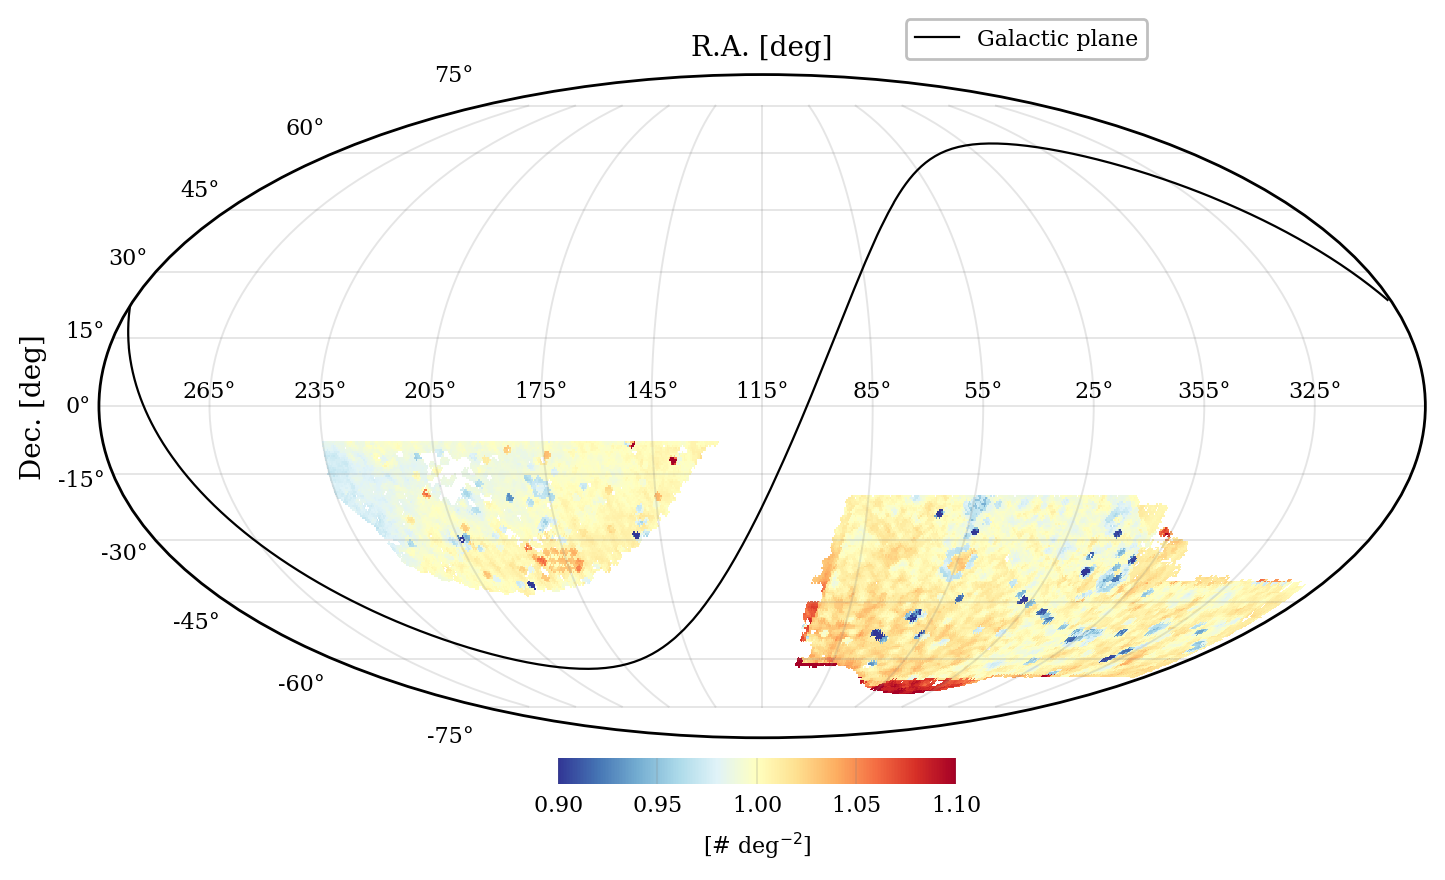

In [ ]:
nside=128 
tracer='LRG'
cat_tar = target_4m_lrg if tracer=='LRG' else target_4m_bg
targets = utils.create_hp_map(cat_tar['RA'], cat_tar['DEC'], nside=nside, nest=True)

w = utils.get_wmap(targets, features_pixmap, mask_pixmap, tracer=tracer, regions=['DECALS', 'DES'])
utils.plot_moll(w, nest=True, min=0.9,max=1.1)

nflod 0 is running


nflod 0 done
nflod 1 is running
nflod 1 done
nflod 2 is running
nflod 2 done
nflod 3 is running
nflod 3 done
nflod 4 is running
nflod 4 done
nflod 5 is running
nflod 5 done
nflod 0 is running
nflod 0 done
nflod 1 is running
nflod 1 done
nflod 2 is running
nflod 2 done
nflod 3 is running
nflod 3 done
nflod 4 is running
nflod 4 done
nflod 5 is running
nflod 5 done


/home/users/r/rocher/Code_NERSC/4MOST/4MOST_CRS_tools/CRStools/utils.py:1107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


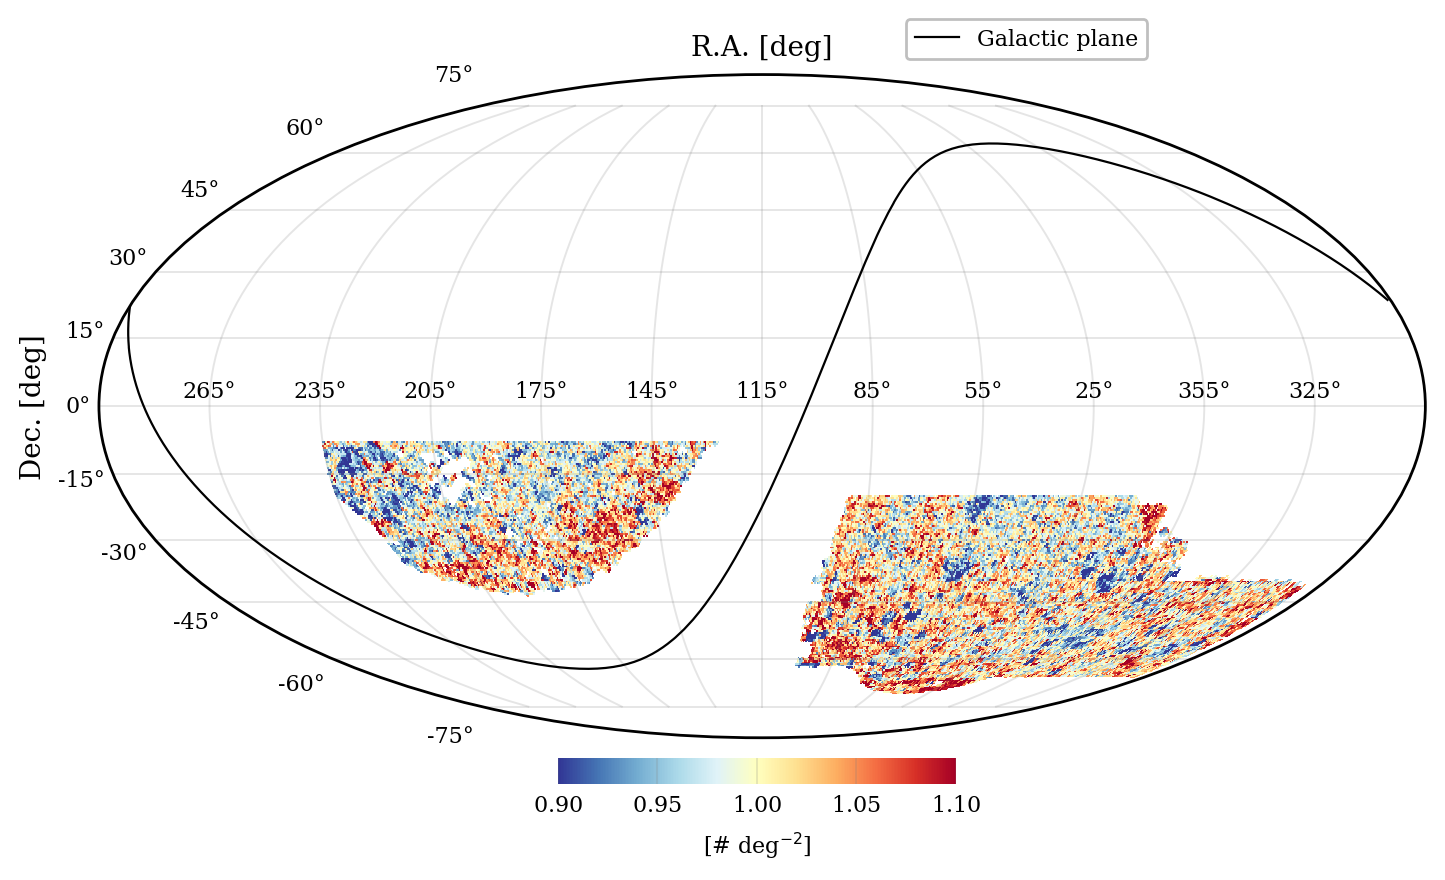

In [ ]:
w_rf = utils.get_wmap(targets, features_pixmap, mask_pixmap, tracer=tracer, regions=['DECALS', 'DES'], regression_type='RF')
utils.plot_moll(w_rf, nest=True, min=0.9,max=1.1)

/home/users/r/rocher/Code_NERSC/4MOST/4MOST_CRS_tools/CRStools/utils.py:1107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


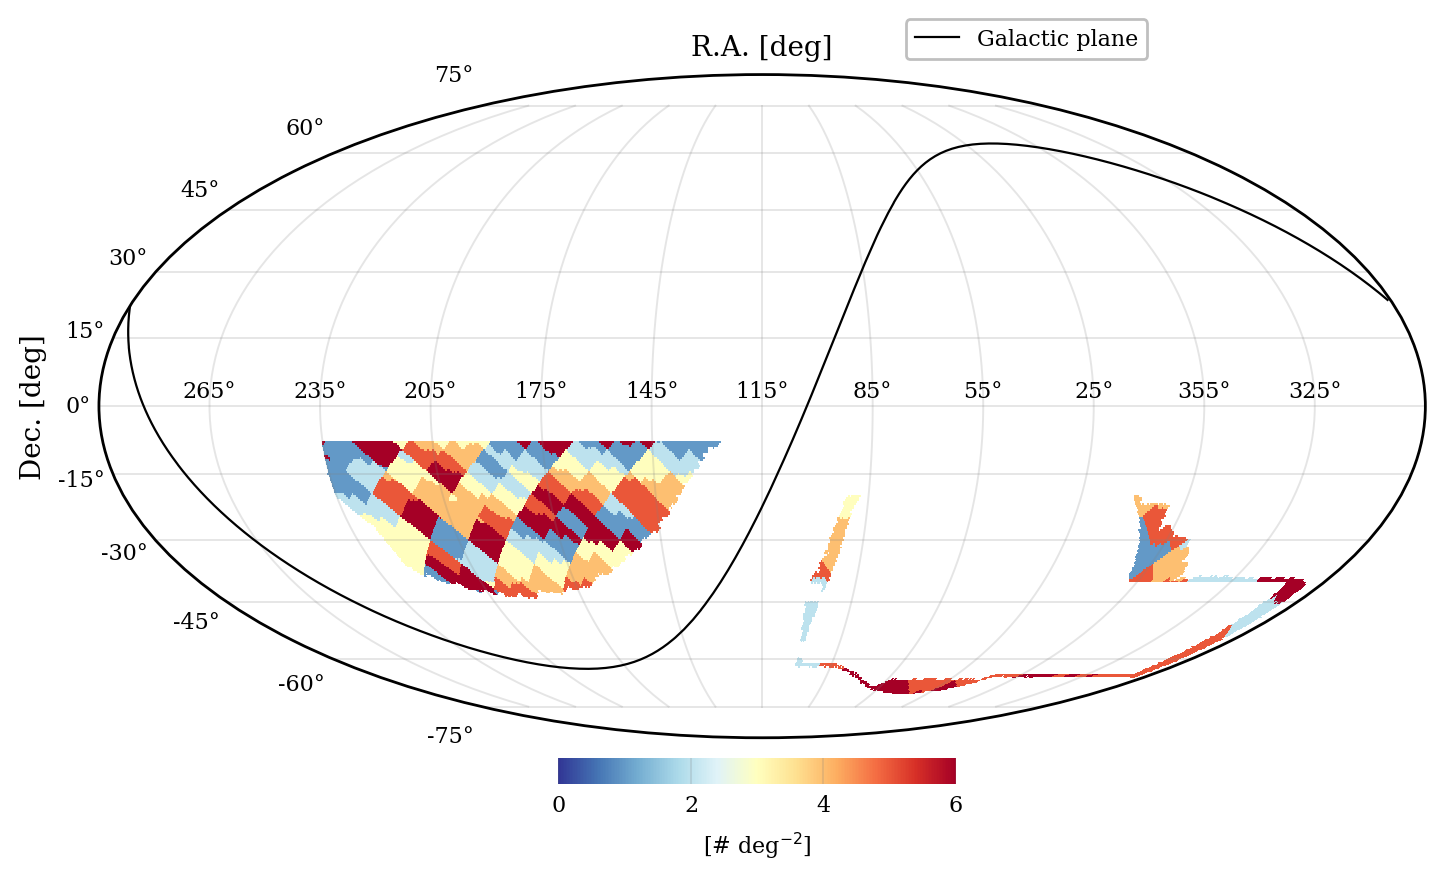

/home/users/r/rocher/Code_NERSC/4MOST/4MOST_CRS_tools/CRStools/utils.py:1107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


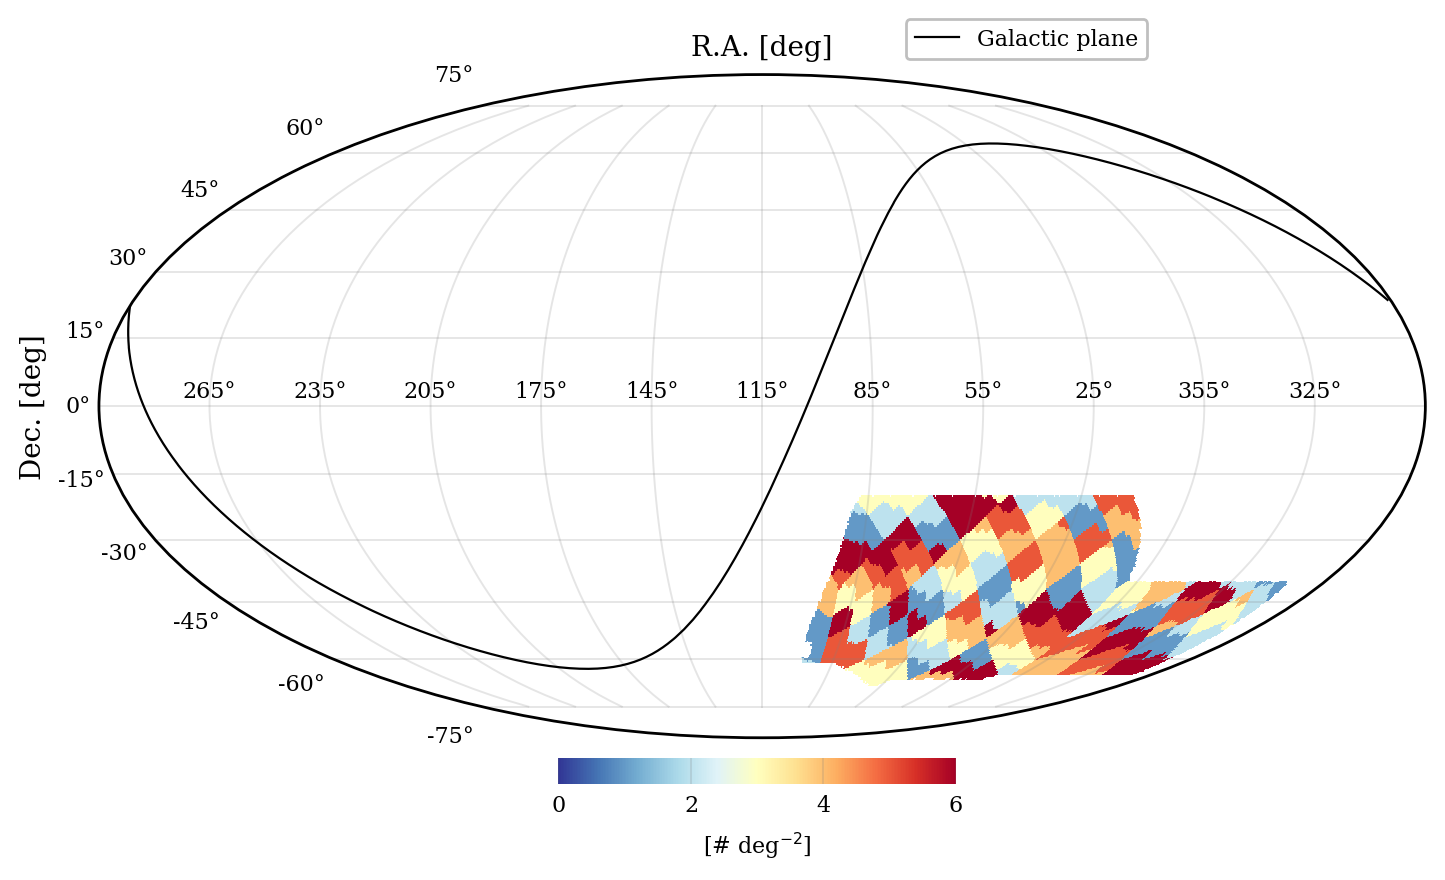

In [ ]:
mask_DECALS = ~mask_pixmap['ISDES'] & mask_pixmap[f'IS4MOST_{tracer}']
mask_DES = mask_pixmap['ISDES'] & mask_pixmap[f'IS4MOST_{tracer}']
utils.plot_kfold(mask_DECALS)
utils.plot_kfold(mask_DES)

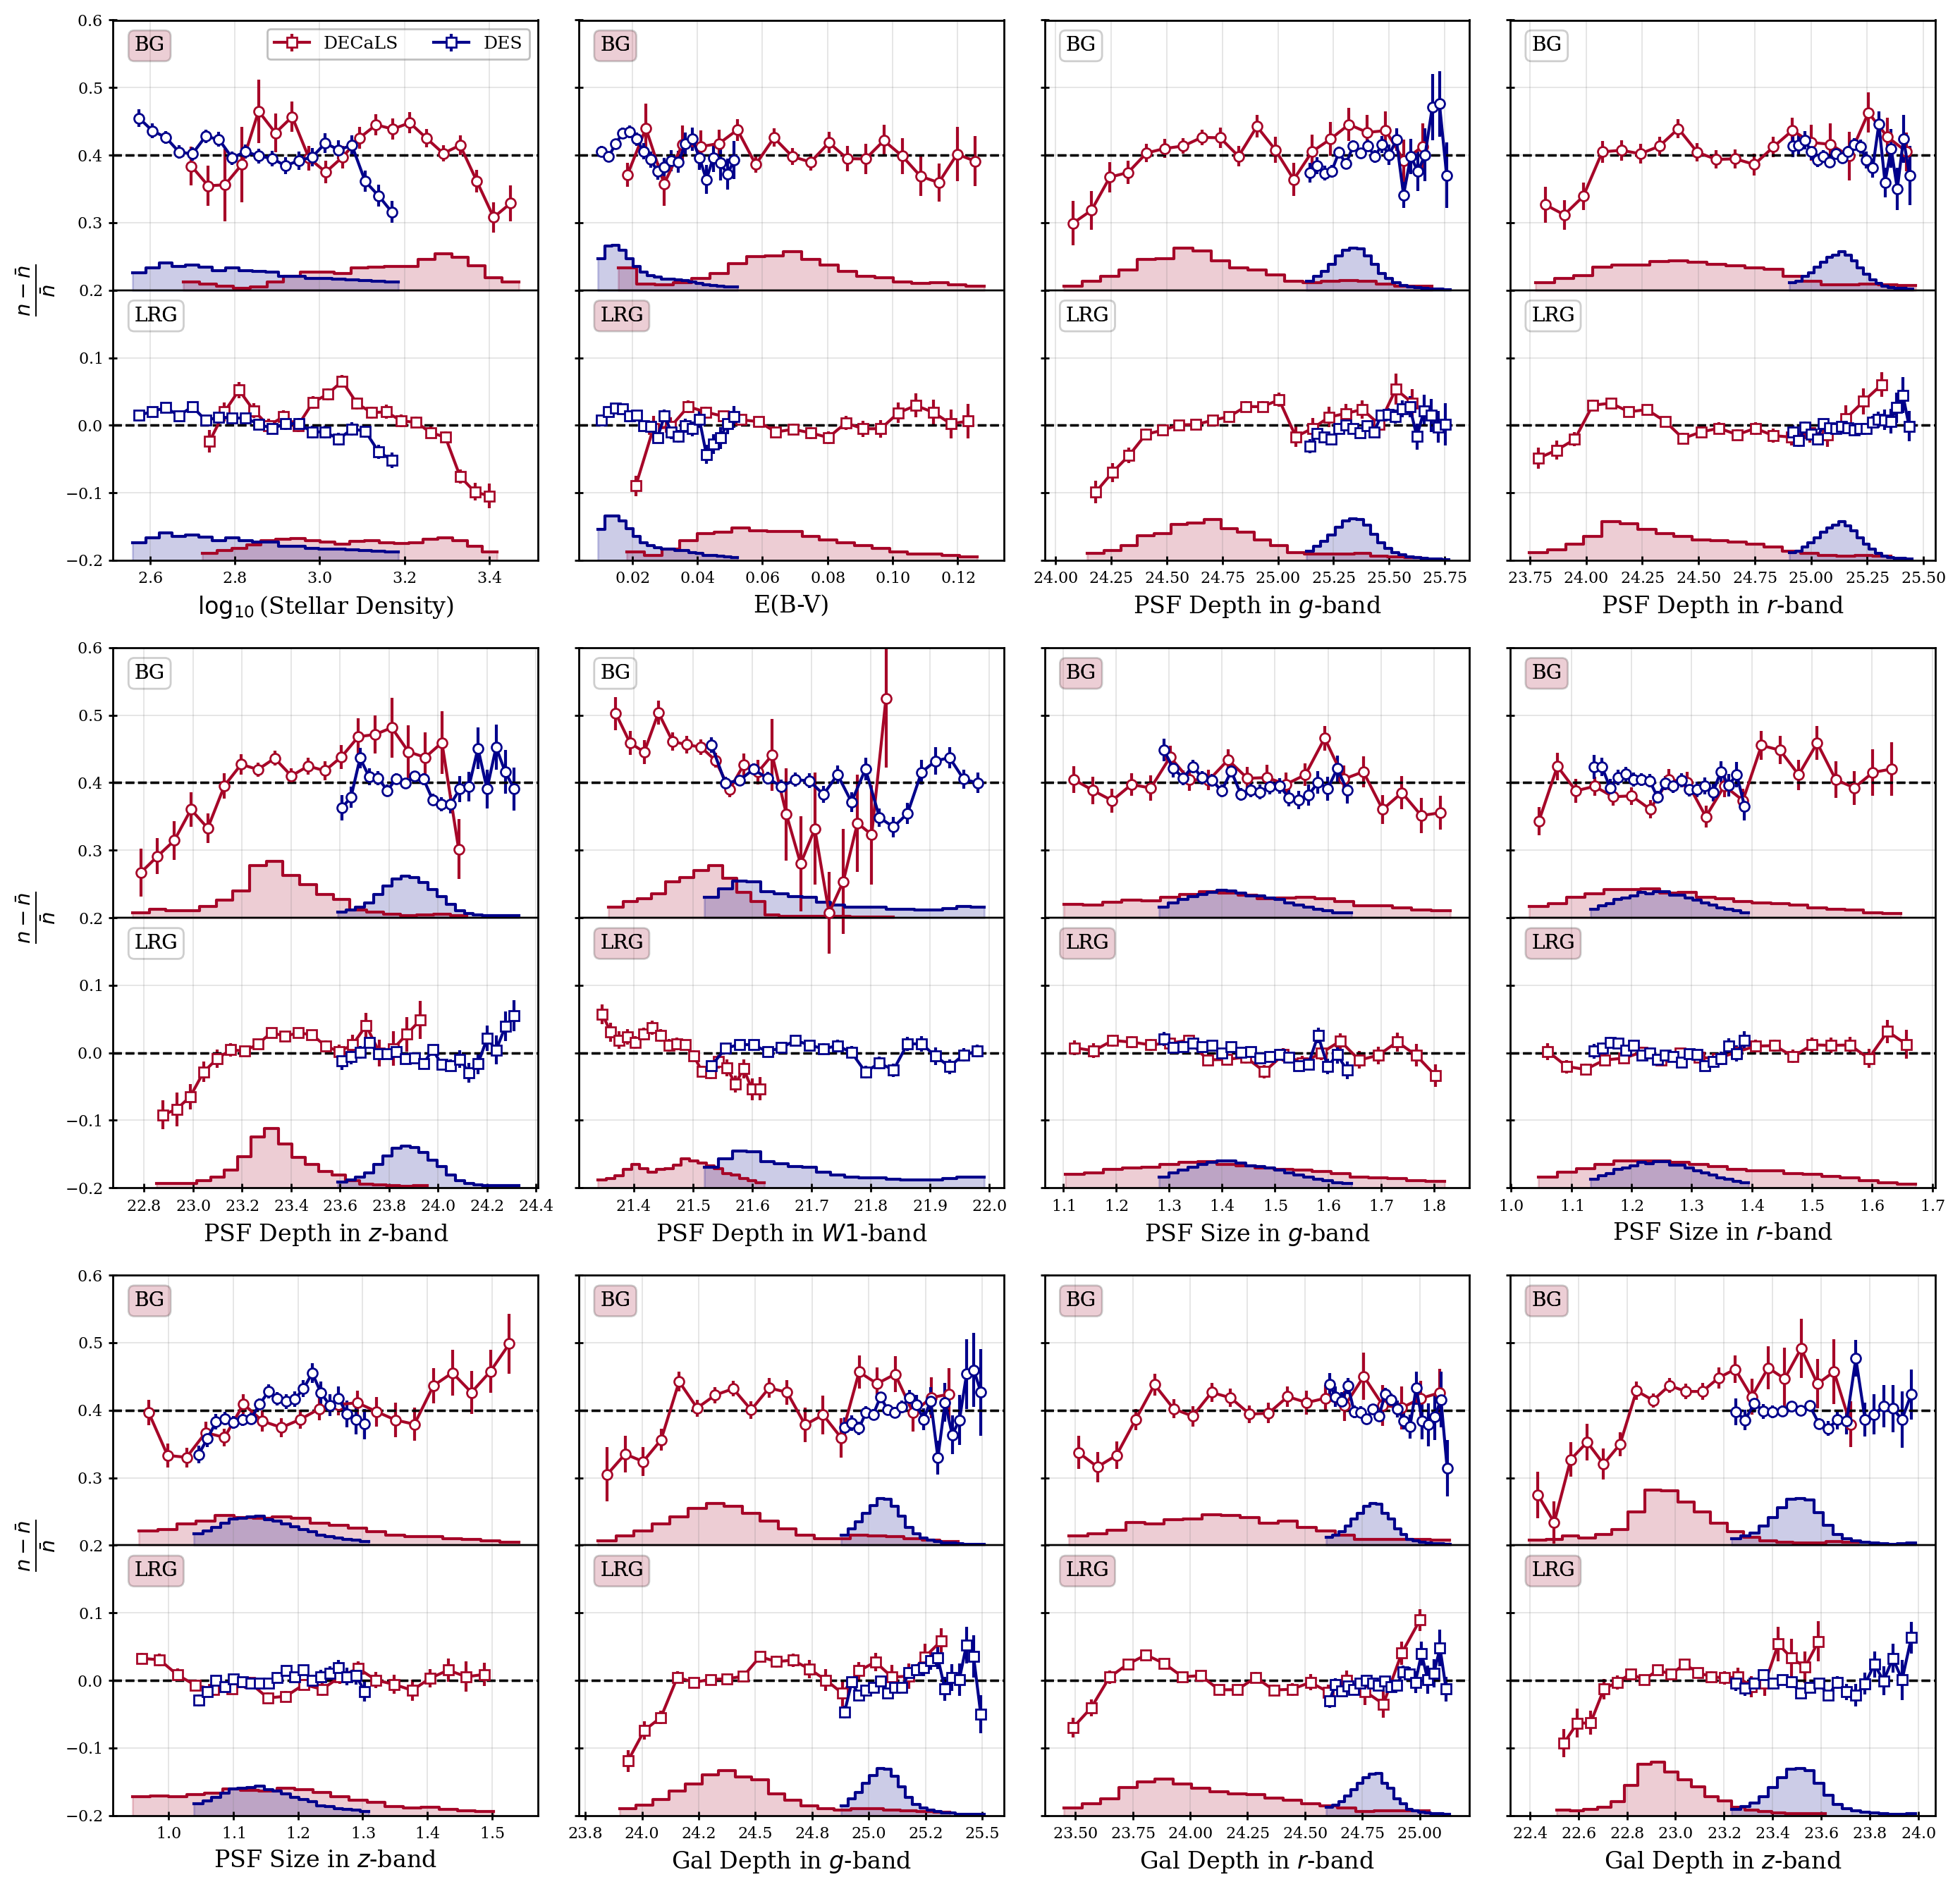

In [ ]:

nside=128 
tracer='LRG'
mask_DECALS = ~mask_pixmap['ISDES'] & mask_pixmap[f'IS4MOST_{tracer}']
mask_DES = mask_pixmap['ISDES'] & mask_pixmap[f'IS4MOST_{tracer}']

targets = utils.create_hp_map(target_4m_lrg['RA'], target_4m_lrg['DEC'], nside=nside, nest=True)
targets_map = utils.apply_mask_to_hpmap(targets, mask_DES)
        
targets_map = [utils.apply_mask_to_hpmap(targets, mask_DECALS), utils.apply_mask_to_hpmap(targets, mask_DES)]
# wtargets_map = [utils.apply_mask_to_hpmap(targets*w, mask_DECALS), utils.apply_mask_to_hpmap(targets*w, mask_DES)]
#wrftargets_map = [utils.apply_mask_to_hpmap(targets*w_rf, mask_DECALS), utils.apply_mask_to_hpmap(targets*w_rf, mask_DES)]

labels_map = ['DECaLS', 'DES']
fig = utils.plot_systmematics(targets_map, features_pixmap, labels_map=labels_map, marker='s', tracer=tracer)


nside=128 
tracer='BG'
mask_DECALS = ~mask_pixmap['ISDES'] & mask_pixmap[f'IS4MOST_{tracer}']
mask_DES = mask_pixmap['ISDES'] & mask_pixmap[f'IS4MOST_{tracer}']

targets = utils.create_hp_map(target_4m_bg['RA'], target_4m_bg['DEC'], nside=nside, nest=True)
targets_map = utils.apply_mask_to_hpmap(targets, mask_DES)
    
targets_map = [utils.apply_mask_to_hpmap(targets, mask_DECALS), utils.apply_mask_to_hpmap(targets, mask_DES)]
# wtargets_map = [utils.apply_mask_to_hpmap(targets*w, mask_DECALS), utils.apply_mask_to_hpmap(targets*w, mask_DES)]
#wrftargets_map = [utils.apply_mask_to_hpmap(targets*w_rf, mask_DECALS), utils.apply_mask_to_hpmap(targets*w_rf, mask_DES)]

labels_map = ['DECaLS', 'DES']
fig = utils.plot_systmematics(targets_map, features_pixmap, fig=fig, marker='o', shift_y=0.4, tracer=tracer)




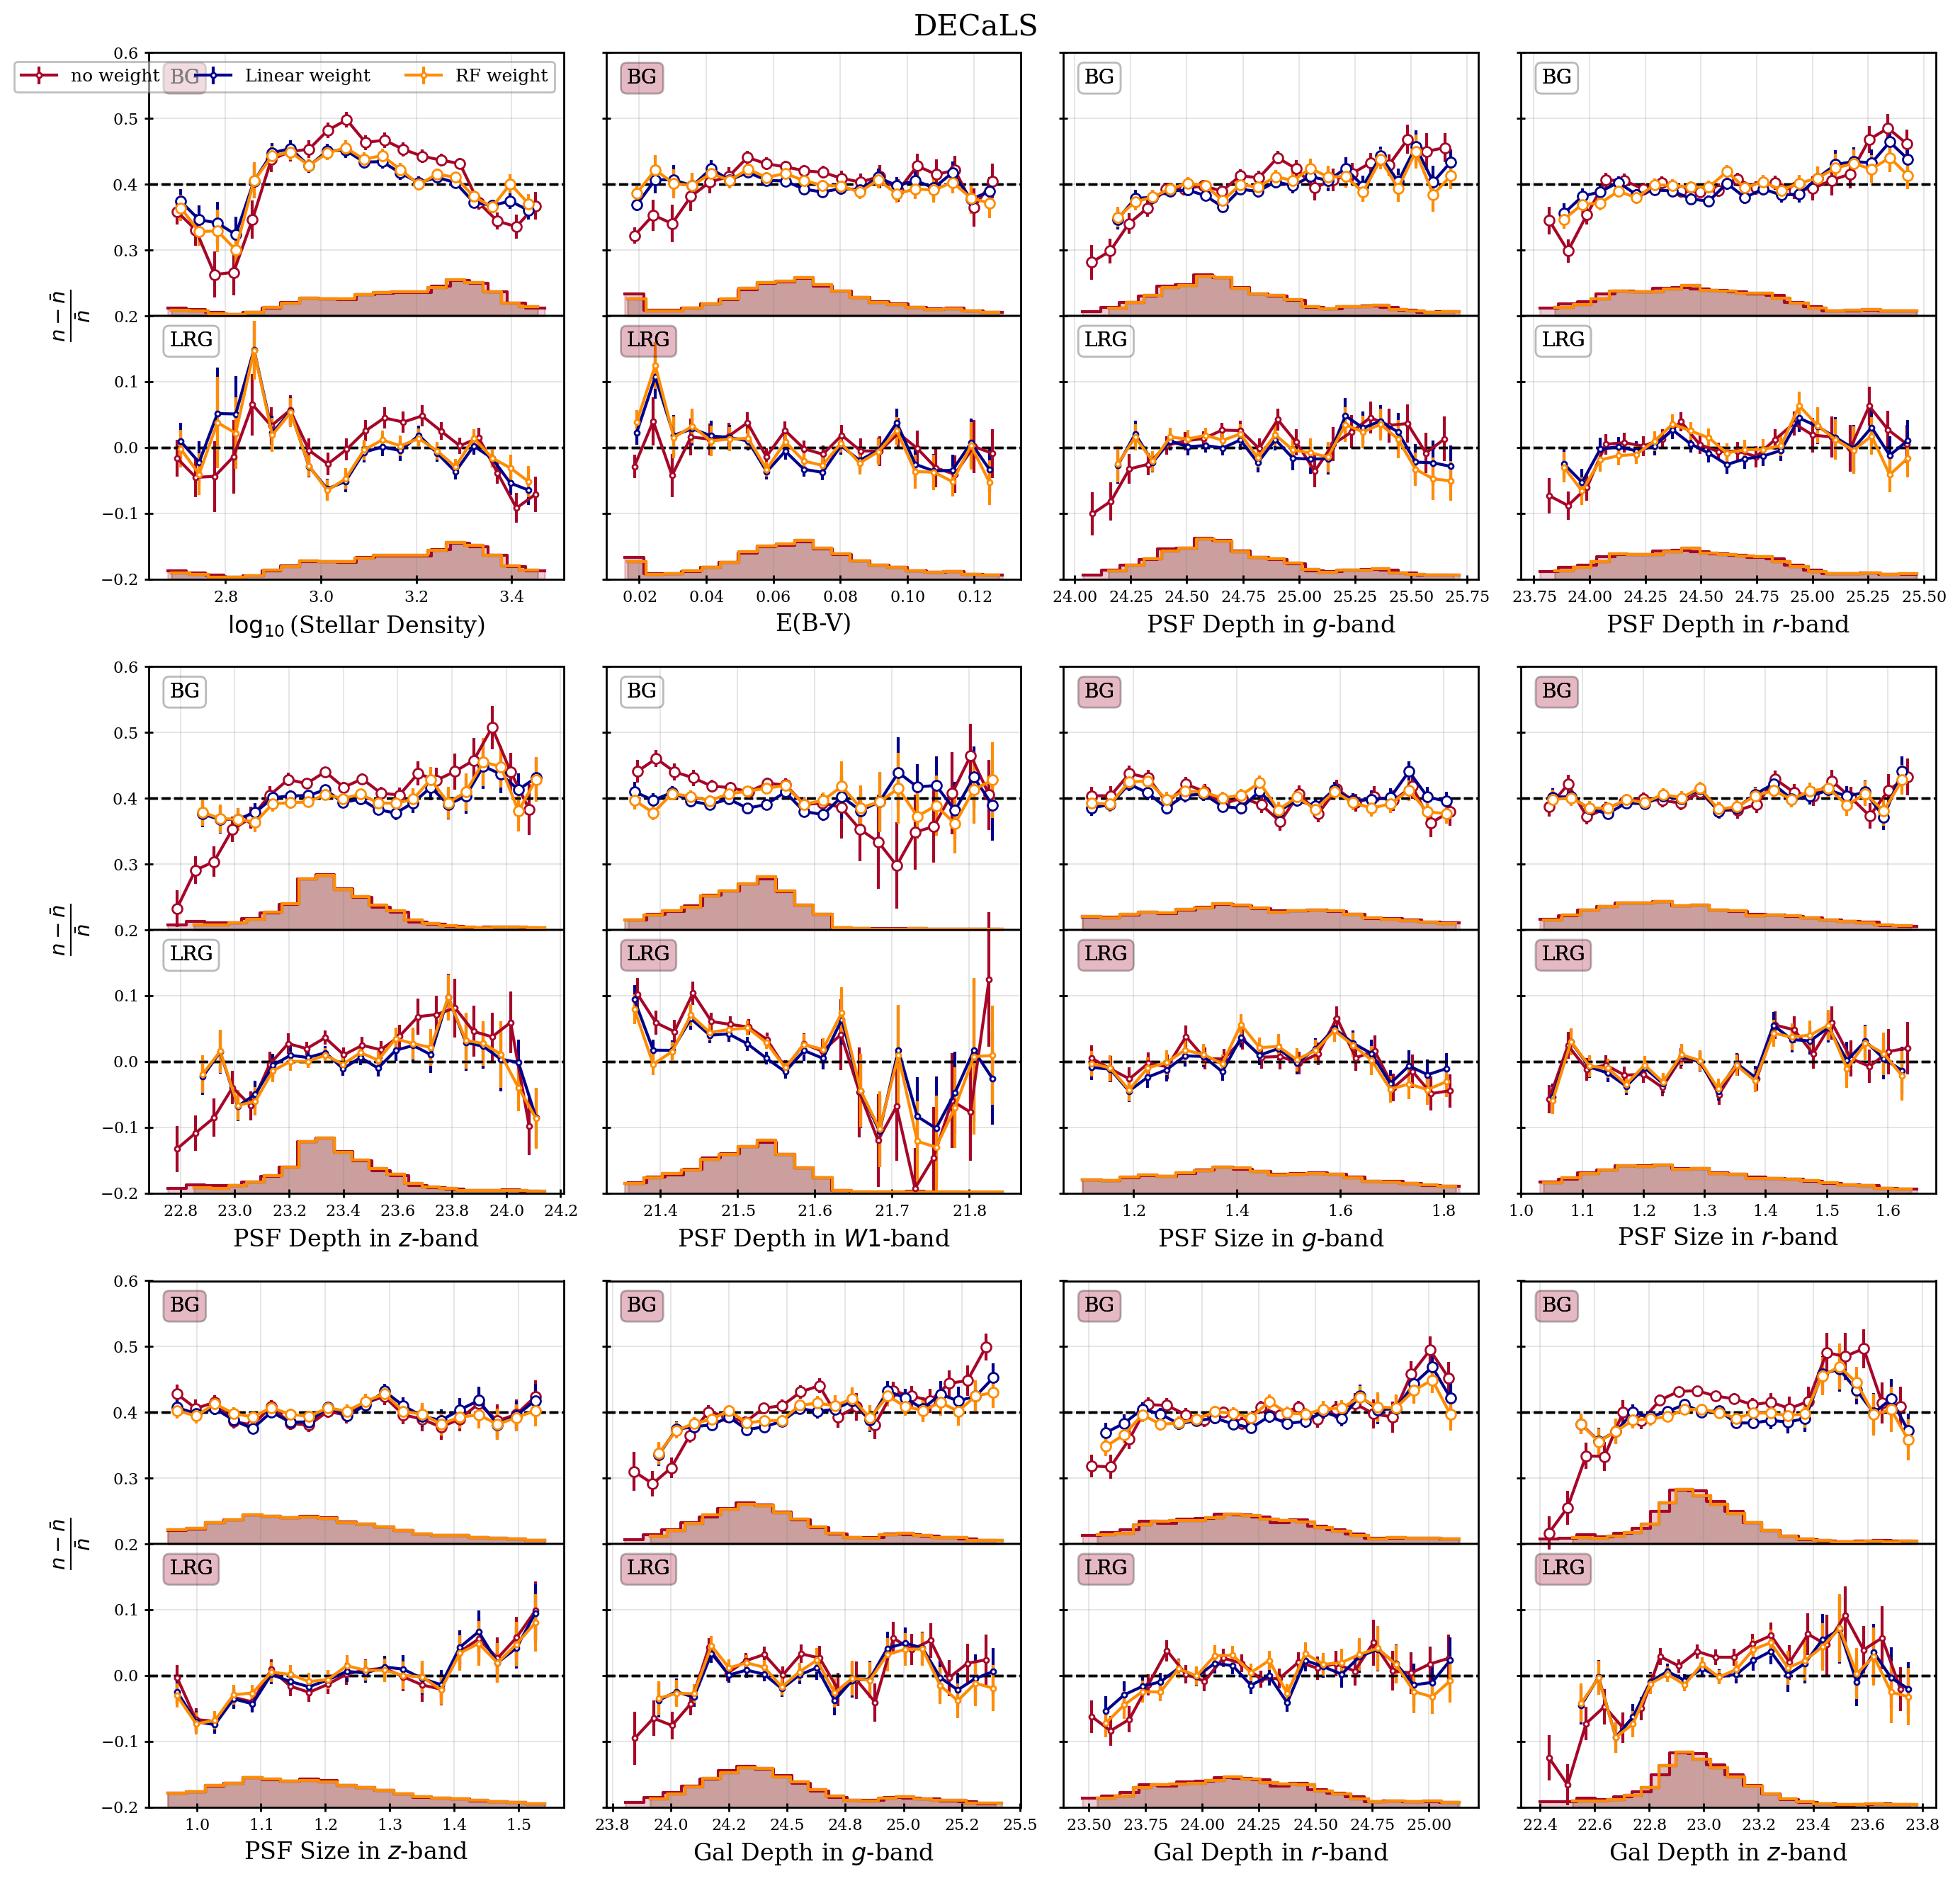

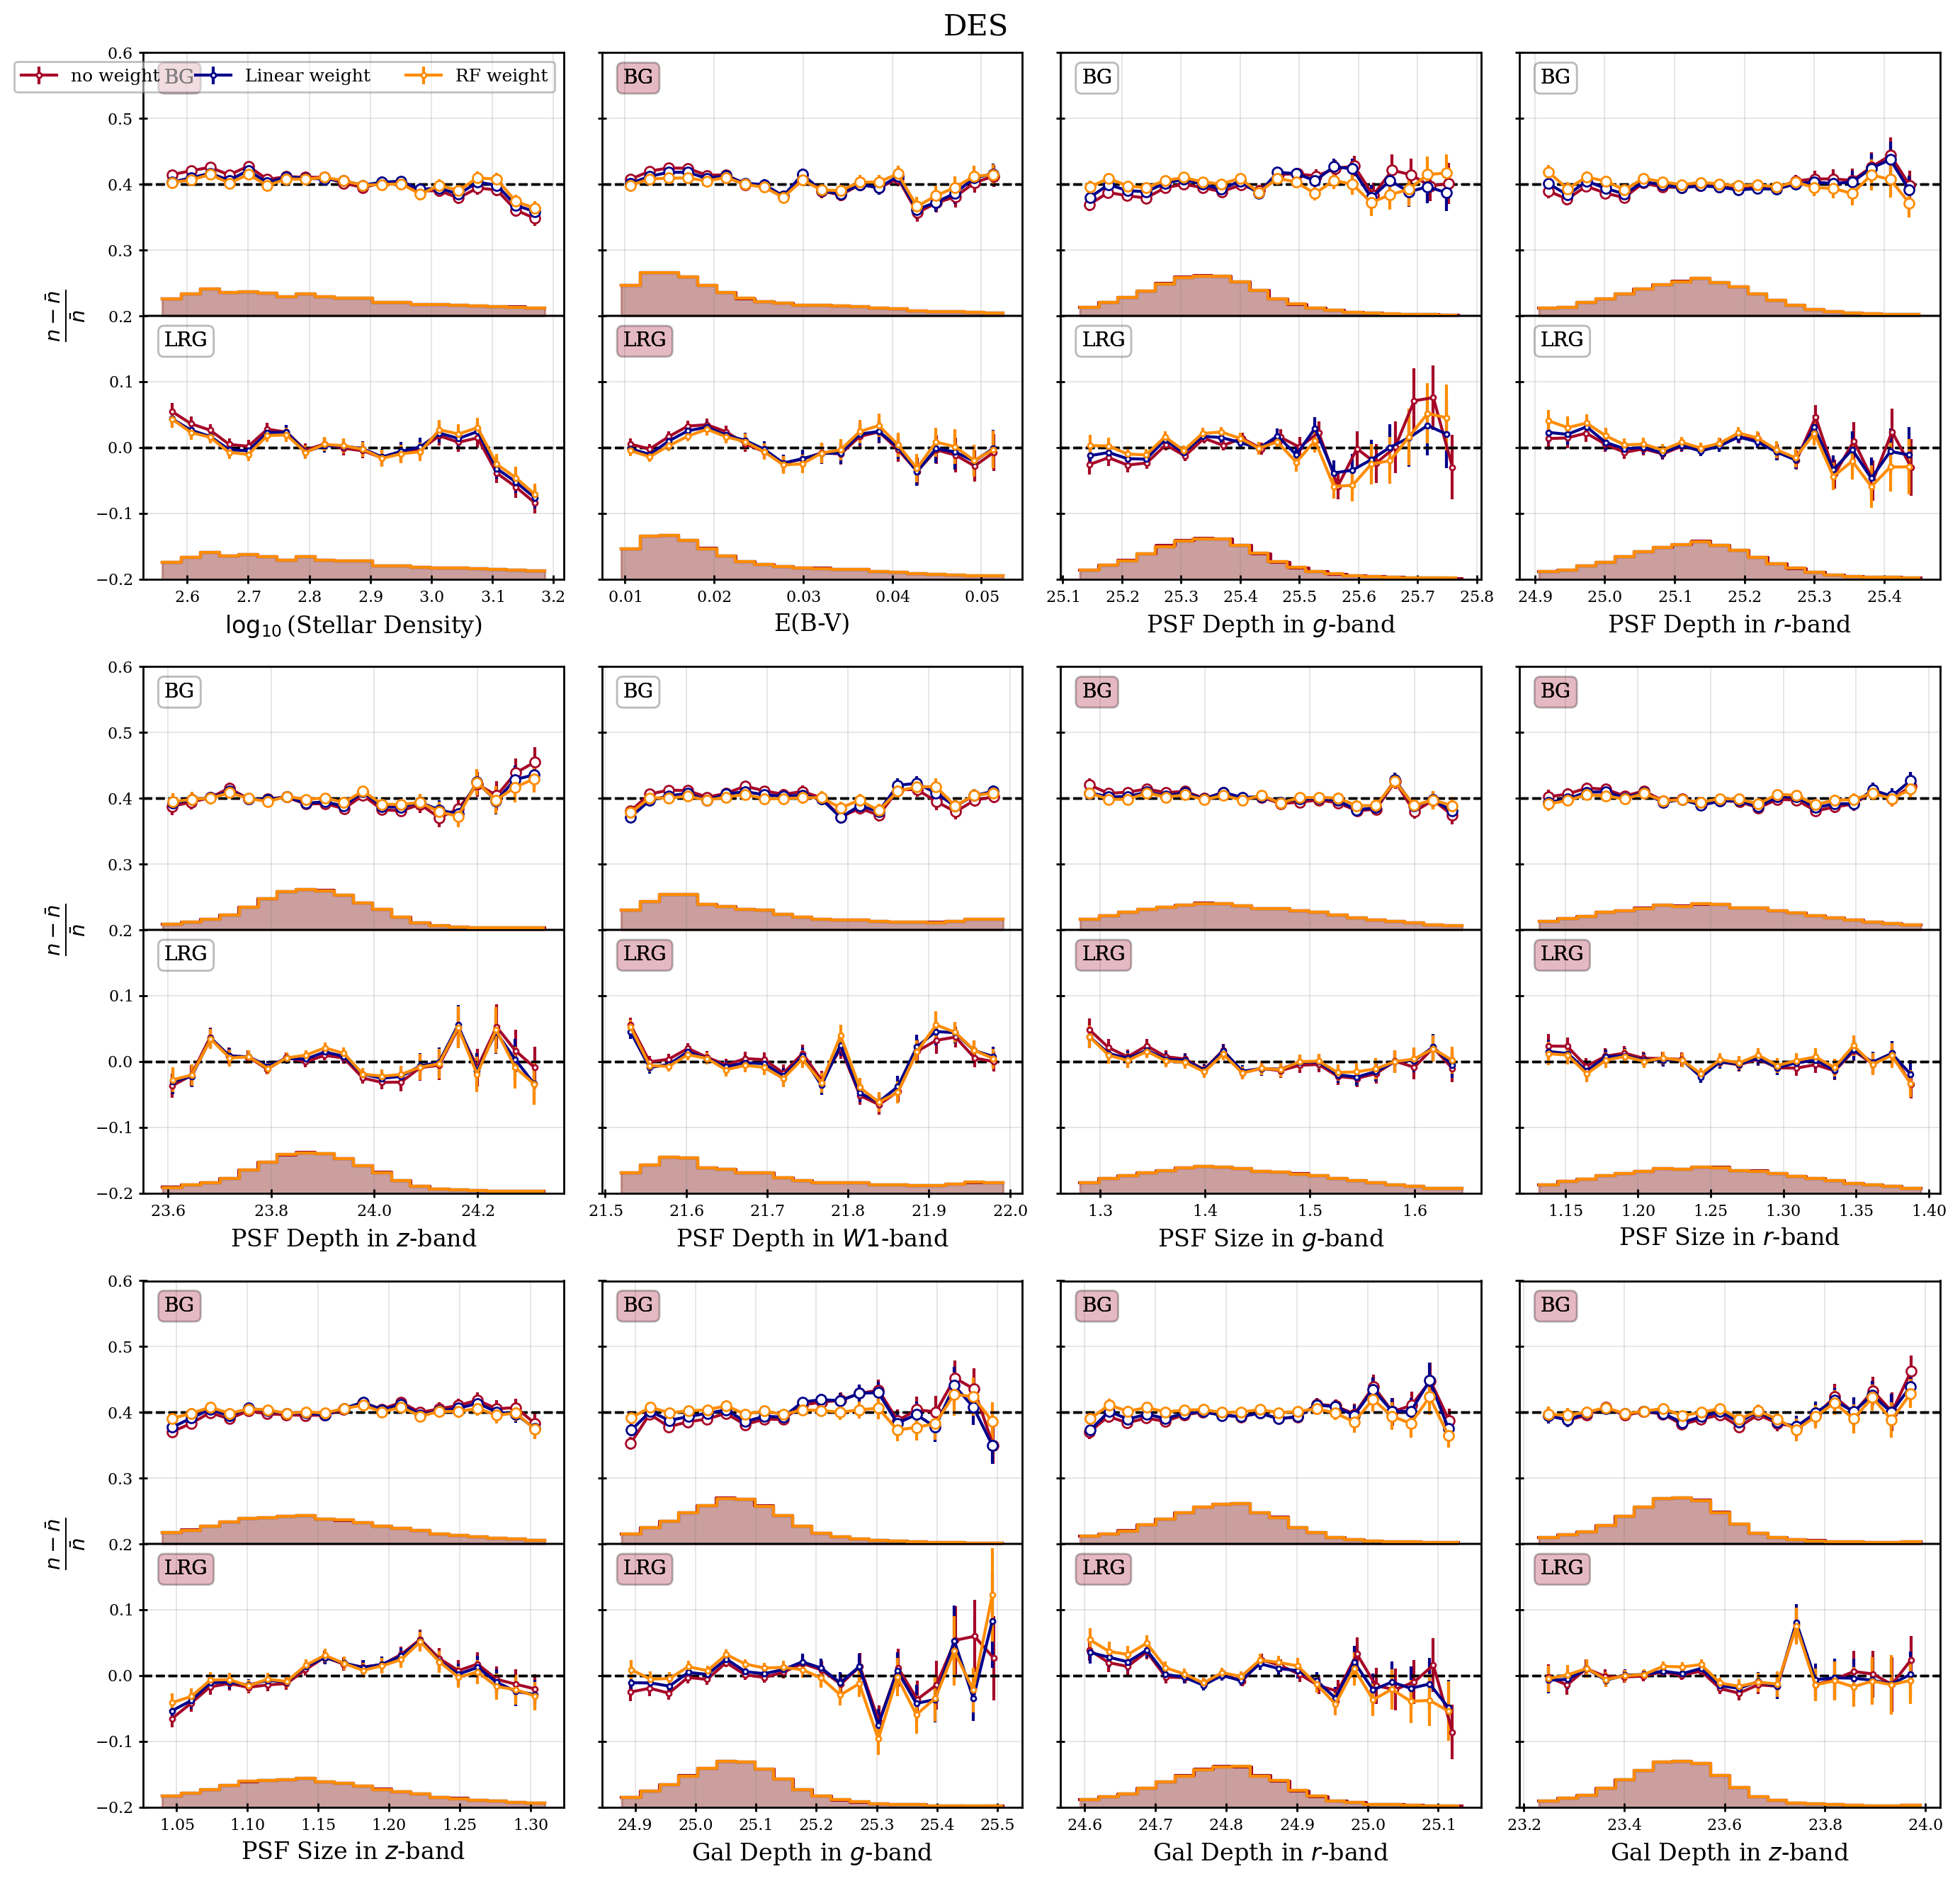

In [ ]:
nside=128 
tracer='BG'
mask_DECALS = ~mask_pixmap['ISDES'] & mask_pixmap[f'IS4MOST_{tracer}']
mask_DES = mask_pixmap['ISDES'] & mask_pixmap[f'IS4MOST_{tracer}']

targets = utils.create_hp_map(target_4m_bg['RA'], target_4m_bg['DEC'], nside=nside, nest=True)
        
targets_map_bg = [utils.apply_mask_to_hpmap(targets, mask_DECALS), utils.apply_mask_to_hpmap(targets, mask_DES)]
wtargets_map_bg = [utils.apply_mask_to_hpmap(targets*w, mask_DECALS), utils.apply_mask_to_hpmap(targets*w, mask_DES)]
wrftargets_map_bg = [utils.apply_mask_to_hpmap(targets*w_rf, mask_DECALS), utils.apply_mask_to_hpmap(targets*w_rf, mask_DES)]

targets = utils.create_hp_map(target_4m_lrg['RA'], target_4m_lrg['DEC'], nside=nside, nest=True)
        
targets_map_lrg = [utils.apply_mask_to_hpmap(targets, mask_DECALS), utils.apply_mask_to_hpmap(targets, mask_DES)]
wtargets_map_lrg = [utils.apply_mask_to_hpmap(targets*w, mask_DECALS), utils.apply_mask_to_hpmap(targets*w, mask_DES)]
wrftargets_map_lrg = [utils.apply_mask_to_hpmap(targets*w_rf, mask_DECALS), utils.apply_mask_to_hpmap(targets*w_rf, mask_DES)]
 
title = 'DECaLS'
labels_map = ['no weight', 'Linear weight', 'RF weight']

fig = utils.plot_systmematics([targets_map_bg[0], wtargets_map_bg[0],wrftargets_map_bg[0]], features_pixmap, labels_map=labels_map, fig_title=title, tracer='BG',ncol_leg=1)

fig = utils.plot_systmematics([targets_map_lrg[0], wtargets_map_lrg[0], wrftargets_map_lrg[0]], features_pixmap, fig_title=title, marker='o', shift_y=0.4, tracer='LRG', fig=fig)
fig.show()

title = 'DES'
labels_map = ['no weight', 'Linear weight', 'RF weight']

fig = utils.plot_systmematics([targets_map_bg[1], wtargets_map_bg[1],wrftargets_map_bg[1]], features_pixmap, labels_map=labels_map, fig_title=title, tracer='BG',ncol_leg=1)

fig = utils.plot_systmematics([targets_map_lrg[1], wtargets_map_lrg[1], wrftargets_map_lrg[1]], features_pixmap, fig_title=title, marker='o', shift_y=0.4, tracer='LRG', fig=fig)